In [2]:
import pandas as pd
import numpy as np

In [34]:
# read csv
df = pd.read_csv('atmajaya.csv')

In [44]:
df['content']

0       Ada adik iship di rumah sakit saya lulusan FK ...
1                     @askmenfess Atmajaya Jogja ada nder
2            Hbd newt scmandaaaaa https://t.co/j6307FLXb5
3       16.34 Arus lalin di Tl Atmajaya Jakut terpanta...
4                              @okkyandrianlola mana bang
                              ...                        
3469    Keinget banget sebel sm ibuk ibuk pamer banget...
3470    @arief_atmajaya masih underage, janganlah, hahaha
3471    [RADIO VISIT]\nHai sobat dista.\nKemarin crew ...
3472         @vinotm Age is just a number kok bang wkwkwk
3473    @Feriza_Atmajaya @Adrianus_adit_s @BadmintonTa...
Name: content, Length: 3474, dtype: object

# Rename Raw Data

In [42]:
df['content'].to_csv('atmajaya-raw.csv')

### Text Preprocessing

In [25]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [26]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [32]:
dfc = df['content'].apply(cleantext)

In [33]:
dfc

0       ada adik iship di rumah sakit saya lulusan fk ...
1                                 atmajaya jogja ada nder
2                                    hbd newt scmandaaaaa
3        arus lalin di tl atmajaya jakut terpantau ram...
4                                               mana bang
                              ...                        
3469    keinget banget sebel sm ibuk ibuk pamer banget...
3470             atmajaya masih underage janganlah hahaha
3471    radio visit hai sobat dista kemarin crew dista...
3472                   age is just number kok bang wkwkwk
3473    atmajaya adit yg biasa itu kalah mas menang ny...
Name: content, Length: 3474, dtype: object

## Stemming

In [37]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [38]:
dfcs

0       ada adik iship di rumah sakit saya lulus fk at...
1                                 atmajaya jogja ada nder
2                                    hbd newt scmandaaaaa
3       arus lalin di tl atmajaya jakut pantau ramai l...
4                                               mana bang
                              ...                        
3469    keinget banget sebel sm ibuk ibuk pamer banget...
3470                atmajaya masih underage jangan hahaha
3471    radio visit hai sobat dista kemarin crew dista...
3472                   age is just number kok bang wkwkwk
3473    atmajaya adit yg biasa itu kalah mas menang ny...
Name: content, Length: 3474, dtype: object

## Stopwords

In [39]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [61]:
dfcst

0       adik iship rumah sakit lulus fk atmajaya biaya...
1                                     atmajaya jogja nder
2                                    hbd newt scmandaaaaa
3        arus lalin tl atmajaya jakut pantau ramai lancar
4                                                    bang
                              ...                        
3469    keinget banget sebel sm ibuk ibuk pamer banget...
3470                             atmajaya underage hahaha
3471    radio visit hai sobat dista kemarin crew dista...
3472                       age is just number bang wkwkwk
3473    atmajaya adit yg kalah mas menang nya jarang haha
Name: content, Length: 3474, dtype: object

# Rename Cleaned Data

In [46]:
dfcst.to_csv('atmajaya-cleaned.csv')

### TF-IDF Vectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [59]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [63]:
tfidf.to_csv('tfidf-atmajaya.csv')

### POS-Tagging

In [65]:
from nltk.tag import CRFTagger

In [66]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [67]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [68]:
dfcst_preprocessed

0       [adik, iship, rumah, sakit, lulus, fk, atmajay...
1                                 [atmajaya, jogja, nder]
2                                [hbd, newt, scmandaaaaa]
3       [arus, lalin, tl, atmajaya, jakut, pantau, ram...
4                                                  [bang]
                              ...                        
3469    [keinget, banget, sebel, sm, ibuk, ibuk, pamer...
3470                         [atmajaya, underage, hahaha]
3471    [radio, visit, hai, sobat, dista, kemarin, cre...
3472                [age, is, just, number, bang, wkwkwk]
3473    [atmajaya, adit, yg, kalah, mas, menang, nya, ...
Name: content, Length: 3474, dtype: object

In [70]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [71]:
tag = ct.tag_sents(dfcst_preprocessed)

In [72]:
tag

[[('adik', 'NN'),
  ('iship', 'NN'),
  ('rumah', 'NN'),
  ('sakit', 'NN'),
  ('lulus', 'NN'),
  ('fk', 'NN'),
  ('atmajaya', 'NN'),
  ('biaya', 'NN'),
  ('spp', 'NN'),
  ('an', 'NN'),
  ('juta', 'CD'),
  ('semester', 'NN'),
  ('uang', 'NN'),
  ('masuk', 'VB'),
  ('ratus', 'NN'),
  ('juta', 'CD'),
  ('biaya', 'NN'),
  ('mahal', 'JJ'),
  ('modal', 'NN'),
  ('dar', 'NN'),
  ('tolong', 'VB'),
  ('orang', 'NN')],
 [('atmajaya', 'NN'), ('jogja', 'NN'), ('nder', 'FW')],
 [('hbd', 'FW'), ('newt', 'FW'), ('scmandaaaaa', 'FW')],
 [('arus', 'NN'),
  ('lalin', 'NN'),
  ('tl', 'NN'),
  ('atmajaya', 'NN'),
  ('jakut', 'NN'),
  ('pantau', 'CC'),
  ('ramai', 'JJ'),
  ('lancar', 'JJ')],
 [('bang', 'VB')],
 [('fakta', 'NN'),
  ('tragedi', 'NN'),
  ('semanggi', 'NN'),
  ('analisis', 'NN'),
  ('hukum', 'NN'),
  ('sosial', 'JJ'),
  ('politik', 'NN'),
  ('moral', 'NN'),
  ('univ', 'NN'),
  ('atmajaya', 'NN'),
  ('harga', 'NN'),
  ('minat', 'NN'),
  ('silah', 'NN'),
  ('pesan', 'NN'),
  ('via', 'NNP'),
  ('i

In [78]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [79]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [95]:
df_tagger

,Word,POS
0,adik,NN
1,iship,NN
2,rumah,NN
3,sakit,NN
4,lulus,NN
...,...,...
37181,mas,NN
37182,menang,NN
37183,nya,NN
37184,jarang,NN


# Rename POS Tagger

In [94]:
df_tagger.to_csv('atmajaya-tagger.csv')

### Merge Dataset

In [105]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [160]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

# Rename Weighted Tag

In [161]:
weighted_tag.to_csv('weighted_tag-atmajaya.csv')

In [162]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

# Rename POS Tag

In [164]:
pos_tag.to_csv('pos_tag-atmajaya.csv')

### bi-gram

In [221]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(kampus, atmajaya)         122
(trisakti, atmajaya)       116
(unika, atmajaya)          112
(universitas, atmajaya)    106
(itb, ipb)                  80
                          ... 
(call, for)                  1
(nih, nonton)                1
(sih, cantik)                1
(ngopi, ngobrol)             1
(lan, hasil)                 1
Length: 27159, dtype: int64

In [222]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [223]:
bigram_df

,index,bigram
0,"(kampus, atmajaya)",122
1,"(trisakti, atmajaya)",116
2,"(unika, atmajaya)",112
3,"(universitas, atmajaya)",106
4,"(itb, ipb)",80
5,"(alumni, atmajaya)",77
6,"(ugm, its)",74
7,"(mahasiswa, atmajaya)",73
8,"(ipb, uns)",73
9,"(univ, atmajaya)",71


In [224]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [225]:
d

[{('kampus', 'atmajaya'): 122,
  ('trisakti', 'atmajaya'): 116,
  ('unika', 'atmajaya'): 112,
  ('universitas', 'atmajaya'): 106,
  ('itb', 'ipb'): 80,
  ('alumni', 'atmajaya'): 77,
  ('ugm', 'its'): 74,
  ('mahasiswa', 'atmajaya'): 73,
  ('ipb', 'uns'): 73,
  ('univ', 'atmajaya'): 71,
  ('unair', 'undip'): 71,
  ('uns', 'unair'): 70,
  ('its', 'itb'): 70,
  ('alumni', 'guru'): 66,
  ('atmajaya', 'guru'): 64,
  ('undip', 'padjajaran'): 63,
  ('indonesia', 'ugm'): 55,
  ('guru', 'indonesia'): 53,
  ('atmajaya', 'yk'): 53,
  ('april', 'kampus'): 49}]

In [226]:
import networkx as nx

In [227]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("atmajaya",weight=100)

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline

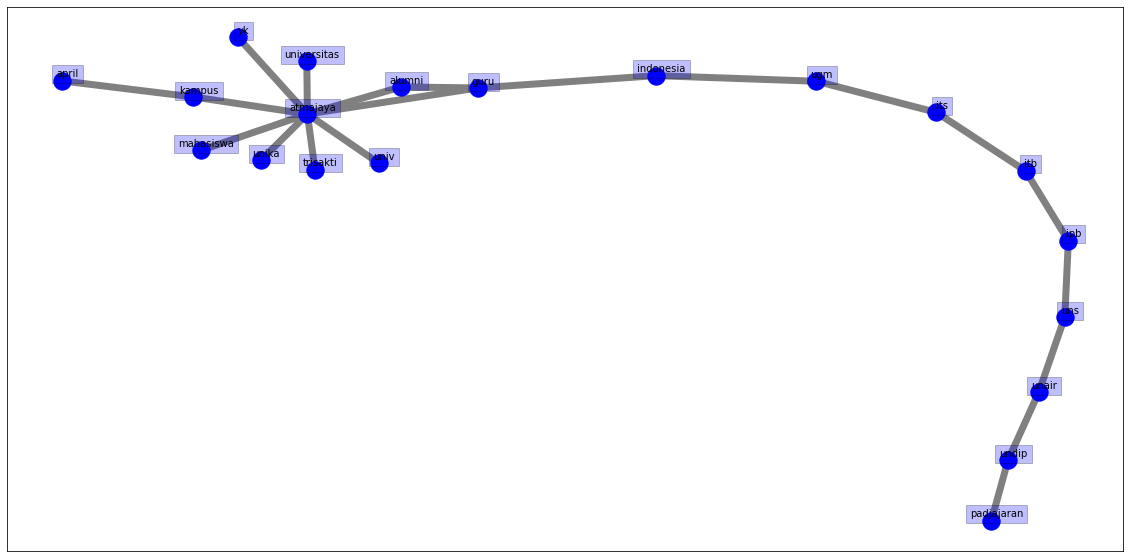

In [239]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [201]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(ugm, its, itb)                70
(ipb, uns, unair)              70
(itb, ipb, uns)                70
(uns, unair, undip)            70
(its, itb, ipb)                70
                               ..
(rabbal, alamin, pedih)         1
(ya, allah, program)            1
(hasil, ngebajak, pulang)       1
(ekonomi, njengkelit, gara)     1
(pas, td, semanggi)             1
Length: 31518, dtype: int64

In [202]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [203]:
trigram_df

,index,trigram
0,"(ugm, its, itb)",70
1,"(ipb, uns, unair)",70
2,"(itb, ipb, uns)",70
3,"(uns, unair, undip)",70
4,"(its, itb, ipb)",70
5,"(trisakti, atmajaya, guru)",64
6,"(unair, undip, padjajaran)",60
7,"(indonesia, ugm, its)",55
8,"(alumni, guru, indonesia)",53
9,"(guru, indonesia, ugm)",53


In [204]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [205]:
d1

[{('ugm', 'its', 'itb'): 70,
  ('ipb', 'uns', 'unair'): 70,
  ('itb', 'ipb', 'uns'): 70,
  ('uns', 'unair', 'undip'): 70,
  ('its', 'itb', 'ipb'): 70,
  ('trisakti', 'atmajaya', 'guru'): 64,
  ('unair', 'undip', 'padjajaran'): 60,
  ('indonesia', 'ugm', 'its'): 55,
  ('alumni', 'guru', 'indonesia'): 53,
  ('guru', 'indonesia', 'ugm'): 53,
  ('parahiyangan', 'trisakti', 'atmajaya'): 48,
  ('undip', 'padjajaran', 'parahiyangan'): 45,
  ('padjajaran', 'parahiyangan', 'trisakti'): 45,
  ('atmajaya', 'guru', 'alumniptmenangkanjokowi'): 44,
  ('april', 'kampus', 'atmajaya'): 43,
  ('mc', 'putrimanjo', 'april'): 42,
  ('etc', 'mc', 'putrimanjo'): 42,
  ('putrimanjo', 'april', 'kampus'): 42,
  ('asterina', 'etc', 'mc'): 42,
  ('kampus', 'atmajaya', 'yk'): 42}]

In [248]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("atmajaya",weight=100)

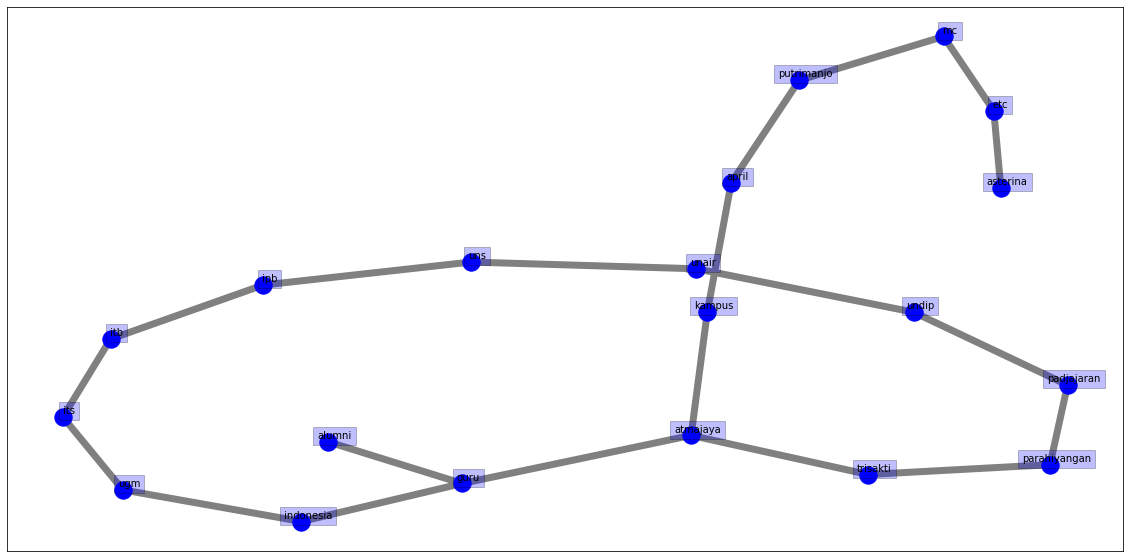

In [261]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [241]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus kristiani jogja'